# Continuous Random Variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import warnings
warnings.filterwarnings("ignore")

# Part 1

Consider the textfile `dataGamma.txt`. This file contains 10,000 observations of a measurement that can be modelled as a continuous random variable. It is known that the variable's distribution corresponds to a Gamma distribution.

Recall that the distribution of a Gamma variable is given by

$$f(x; \alpha, \beta) = \frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
with $x$, $\alpha$, $\beta > 0$ 

where 

$$\Gamma(z) = \int_{0}^{\infty}t^{z-1}e^{-t}dt$$

For the particular case of **all positive integers**, it is known that 
$$\Gamma(\alpha) = (\alpha-1)!$$


### a) Histogram
(no predefined functions)

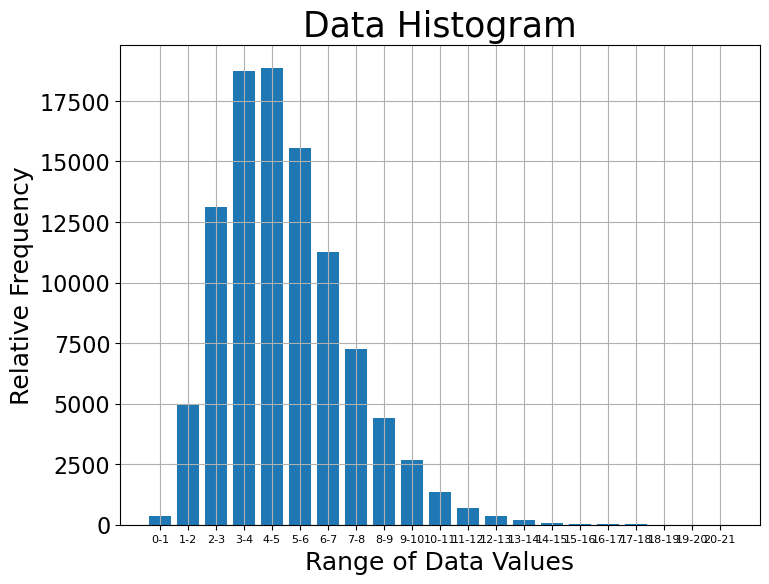

In [2]:
# Data is imported from the .txt file
filename = 'dataGamma.txt'
data = np.genfromtxt(filename, delimiter='\n', dtype=float)

# Create a list for each different interval.
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
group8 = []
group9 = []
group10 = []
group11 = []
group12 = []
group13 = []
group14 = []
group15 = []
group16 = []
group17 = []
group18 = []
group19 = []
group20 = []
group21 = []

# Store a specific data point in a specific list, depending on whether the data point falls within a certain range of values.
for datum in data:
    if datum >= 0 and datum <= 1:
        group1.append(datum)
    elif datum > 1 and datum <= 2:
        group2.append(datum)
    elif datum > 2 and datum <= 3:
        group3.append(datum)
    elif datum > 3 and datum <= 4:
        group4.append(datum)
    elif datum > 4 and datum <= 5:
        group5.append(datum)
    elif datum > 5 and datum <= 6:
        group6.append(datum)
    elif datum > 6 and datum <= 7:
        group7.append(datum)
    elif datum > 7 and datum <= 8:
        group8.append(datum)
    elif datum > 8 and datum <= 9:
        group9.append(datum)
    elif datum > 9 and datum <= 10:
        group10.append(datum)
    elif datum > 10 and datum <= 11:
        group11.append(datum)
    elif datum > 11 and datum <= 12:
        group12.append(datum)
    elif datum > 12 and datum <= 13:
        group13.append(datum)
    elif datum > 13 and datum <= 14:
        group14.append(datum)
    elif datum > 14 and datum <= 15:
        group15.append(datum)
    elif datum > 15 and datum <= 16:
        group16.append(datum)
    elif datum > 16 and datum <= 17:
        group17.append(datum)
    elif datum > 17 and datum <= 18:
        group18.append(datum)
    elif datum > 18 and datum <= 19:
        group19.append(datum)
    elif datum > 19 and datum <= 20:
        group20.append(datum)
    elif datum > 20 and datum <= 21:
        group21.append(datum)

# Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
groups = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10','10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21']
frequency = [len(group1), len(group2), len(group3), len(group4), len(group5), len(group6), len(group7), len(group8), len(group9), len(group10), len(group11), len(group12), len(group13), len(group14), len(group15), len(group16), len(group17), len(group18), len(group19), len(group20), len(group21)]
ax.bar(groups, frequency)
plt.grid()
plt.title('Data Histogram', fontsize=25)
ax.set_xlabel('Range of Data Values', fontsize = 18)
ax.set_ylabel('Relative Frequency', fontsize = 18)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 16)
plt.show()


### b) Estimation of the CDF

From the histogram, find a simple way to estimate the CDF of the random variable, and plot the result. Keep in mind that the CDF is a cumulative distribution. Justify your answer. 

(no predefined functions)


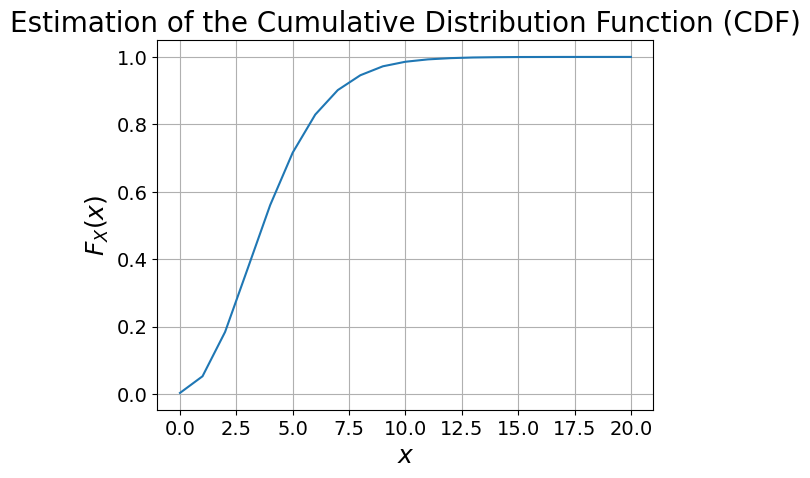

In [3]:
# Generate a vector to store the value of the cumulative distribution function
acum = np.zeros((len(frequency), 1))

# Generate a vector that serves as the X axis for the cumulative distribution.
# This vector covers the range of the data.
x_axis = np.linspace(0, 20, len(frequency))

# Fill the CDF vector by summing the value of the previous frequency to the
# current frequency.
for i in range(len(frequency)):
    if i == 0:
        acum[i] = frequency[i]
    else:
        acum[i] = frequency[i] + acum[i-1]

# Normalize the data
acum = acum / len(data)

# Plot
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_axis, acum)
plt.grid()
plt.title('Estimation of the Cumulative Distribution Function (CDF)', fontsize=20)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$F_X(x)$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


### c) Estimation of the PDF

Using the histogram from part **a)**, find a simple way to estimate the PDF of that random variable, and plot the result. Keep in mind that the PDF is a probability density, i.e., probability per unit of the random variable.

(no predefined functions)

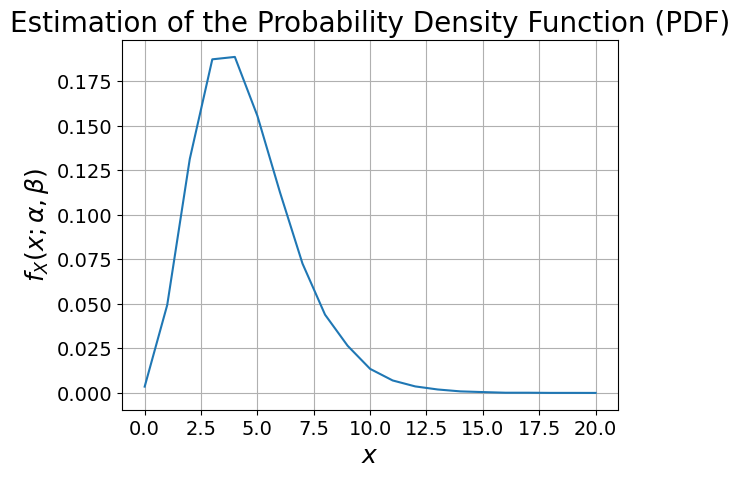

In [4]:
# Generate a vector to store the value of the Probability Density Function (PDF)
pdf = np.zeros((len(frequency), 1))

# Generate a vector that serves as the X axis for the PDF.
# This vector covers the range of the data.
x_axis = np.linspace(0, 20, len(frequency))

# Fill the PDF vector knowing that in each component it should contain the
# frequency of an interval divided by the number of data points.
for i in range(len(pdf)):
    pdf[i] = frequency[i] / len(data)

# Plot
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_axis, pdf)
plt.grid()
plt.title('Estimation of the Probability Density Function (PDF)', fontsize=20)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f_X(x;\alpha,\beta)$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### d) Determination of the parameters that the random variable may have and the parameters of the real PDF.

Based on the estimation of the PDF, we determine the parameters that the random variable may have and the parameters of the real PDF. To do this, we overlapped the graph of the estimated PDF and the PDF that we consider to be real. Recall that the PDF of a Gamma variable is defined by two parameters: shape $\alpha$ and scale $\beta$. 

(no predefined functions)

***Note: By definition, it is known that $P(a \leq z \leq b) = \int_{a}^{b}f_Z(z)dz$. If we assume that $\Delta = b-a$ is small, then we would have $P(a \leq z \leq b) \approx f_Z(a)\Delta$, or in other words, $f_Z(a) \approx P(a \leq z \leq b)/\Delta$. We use this approximation to solve this problem.***


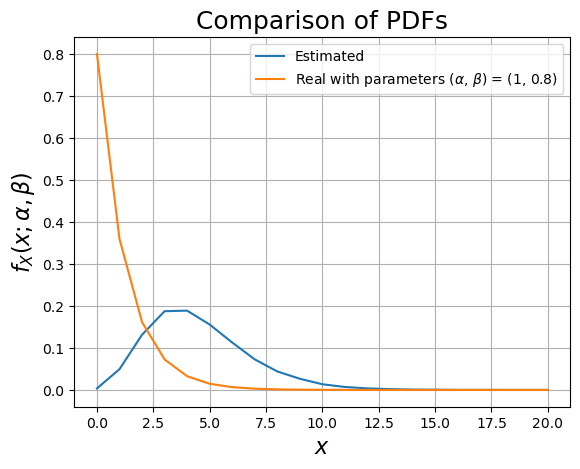

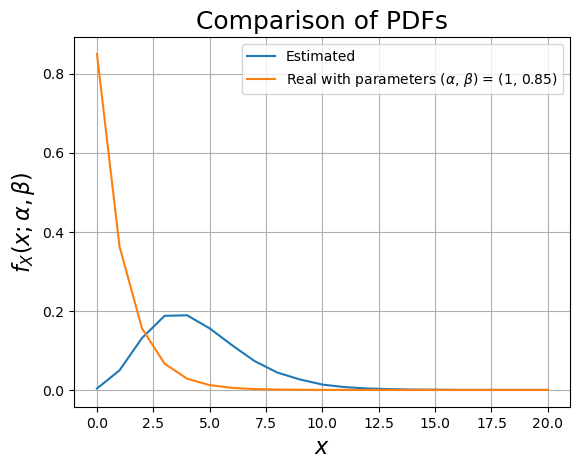

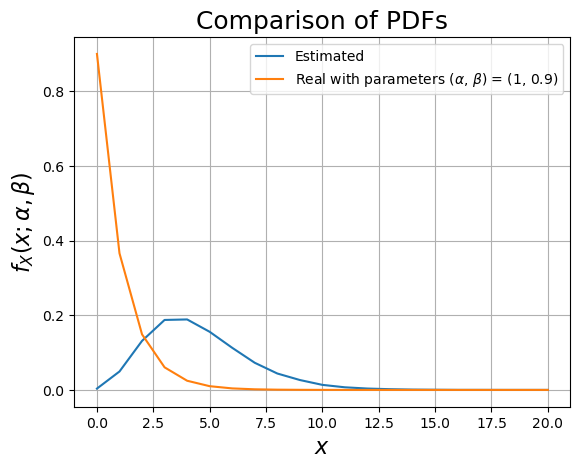

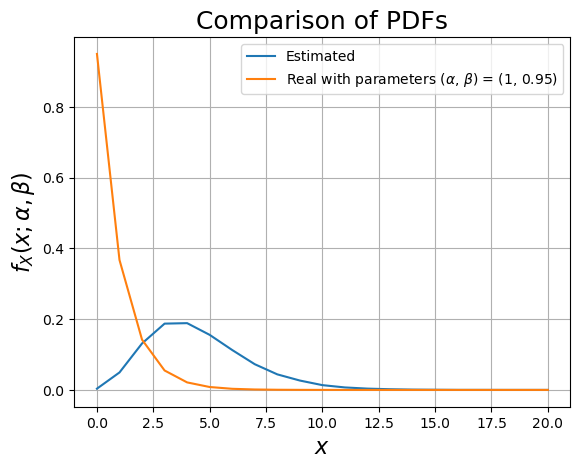

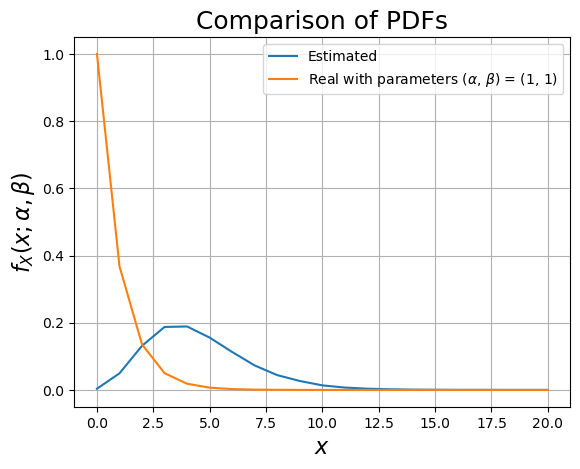

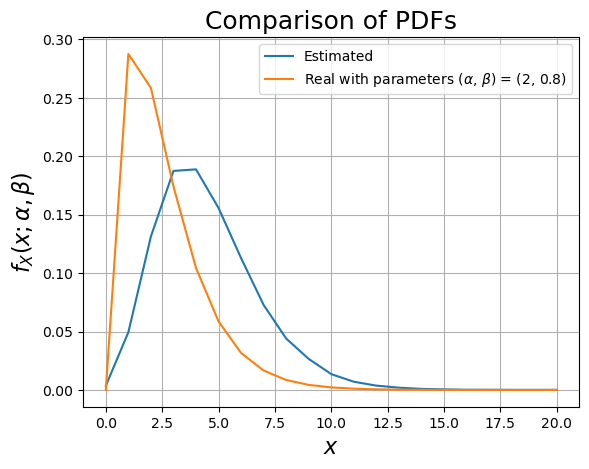

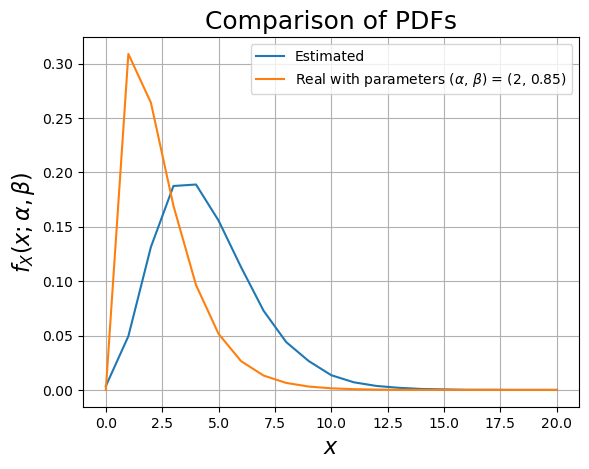

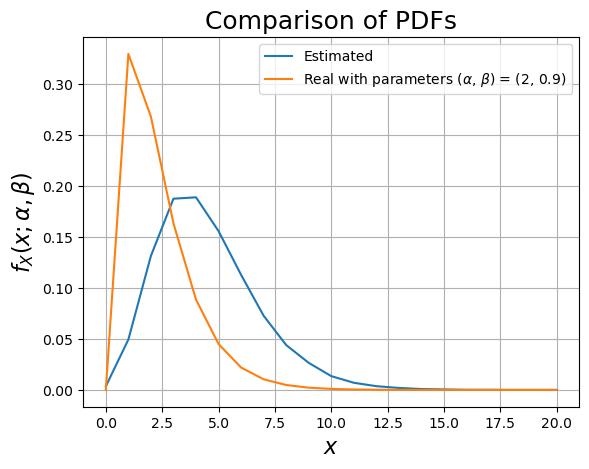

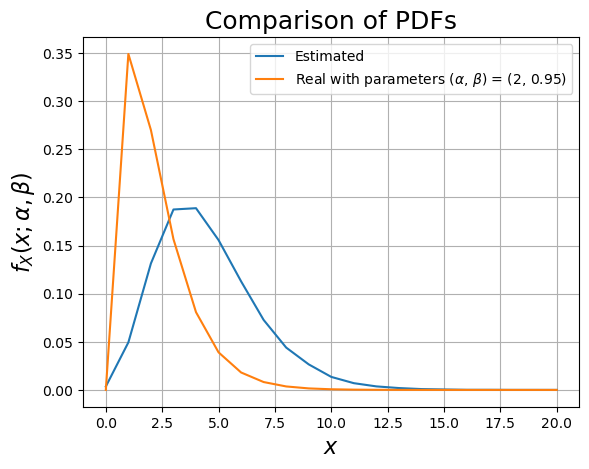

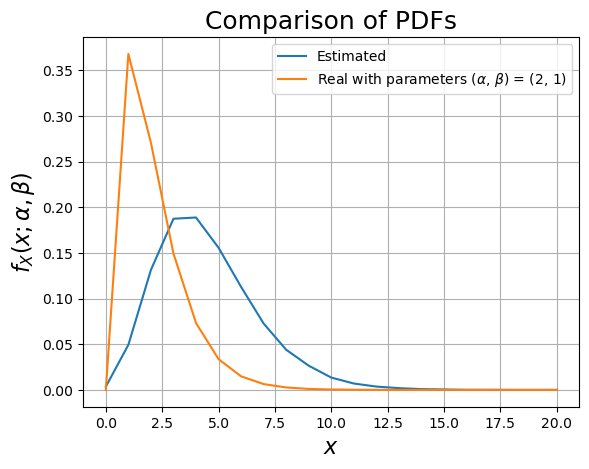

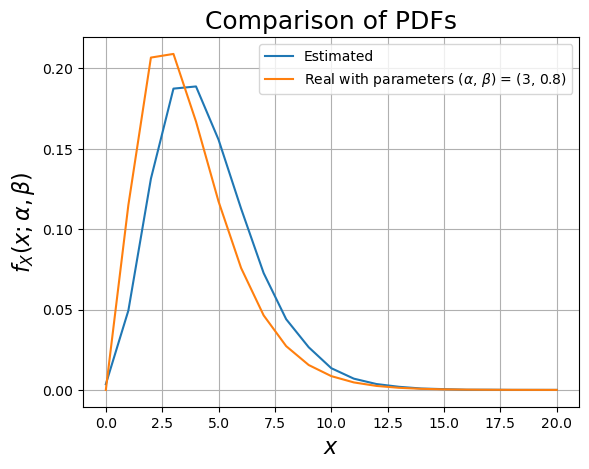

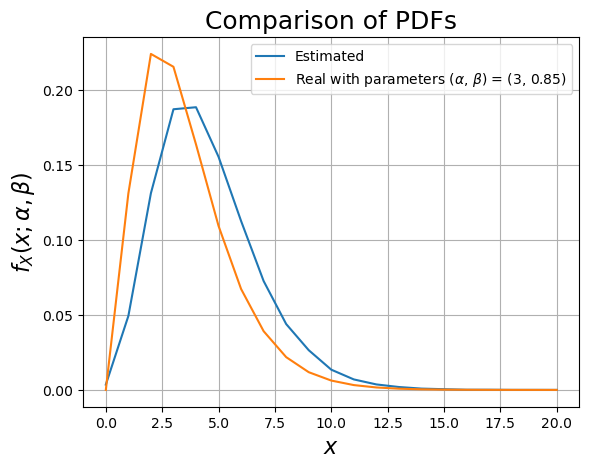

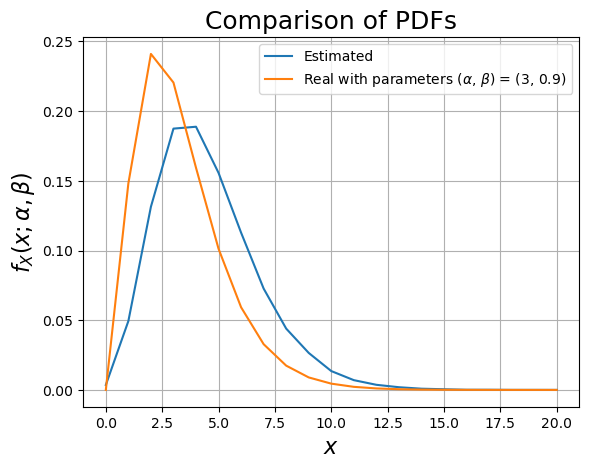

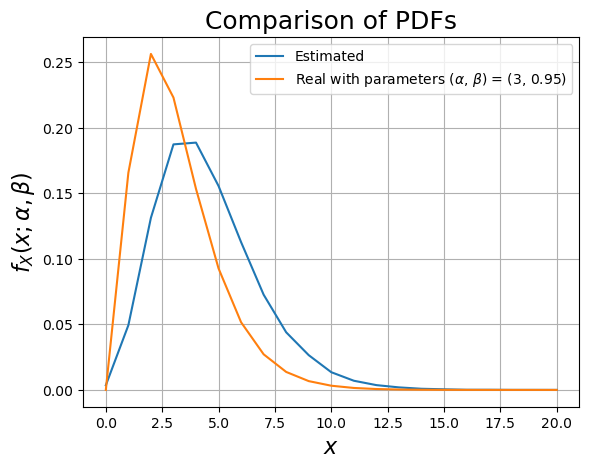

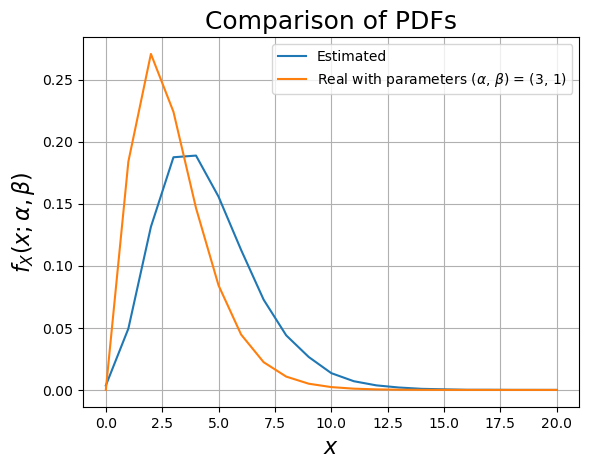

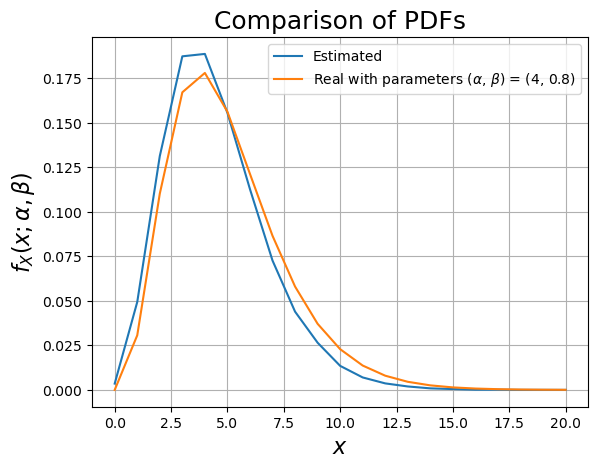

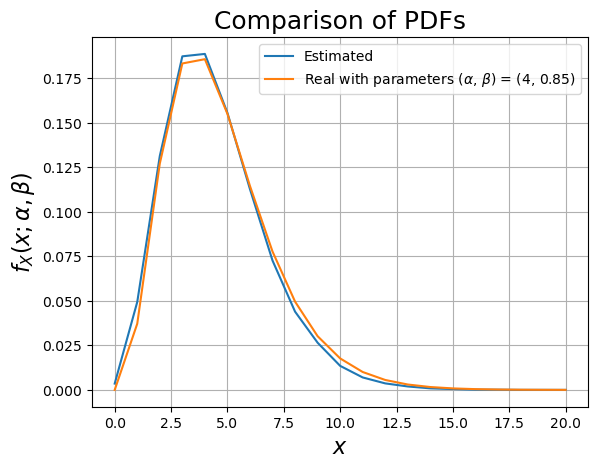

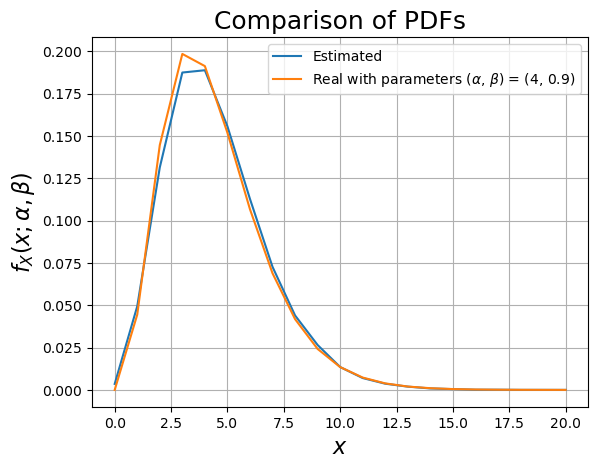

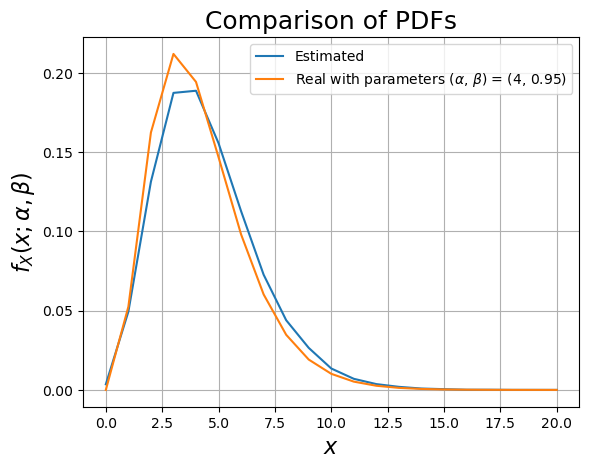

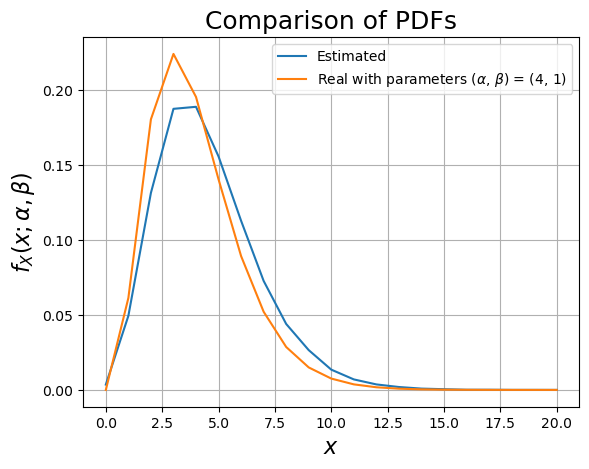

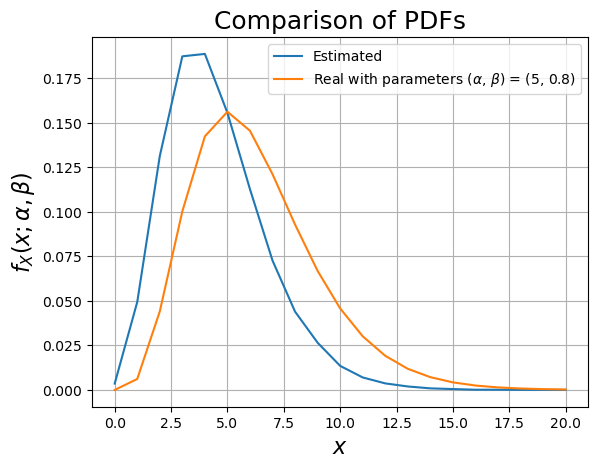

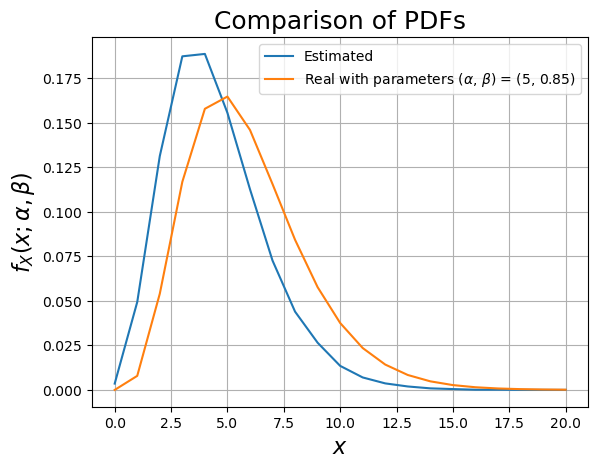

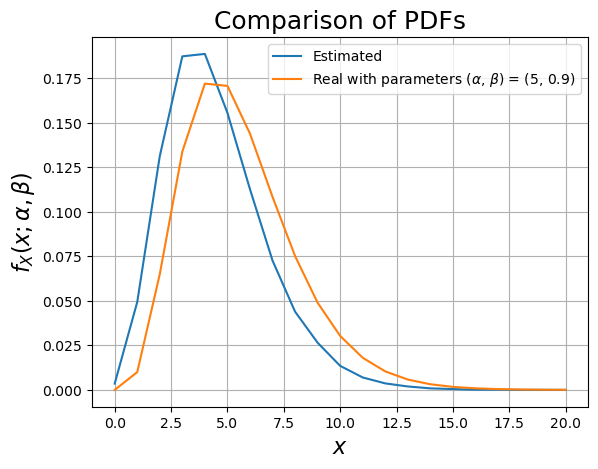

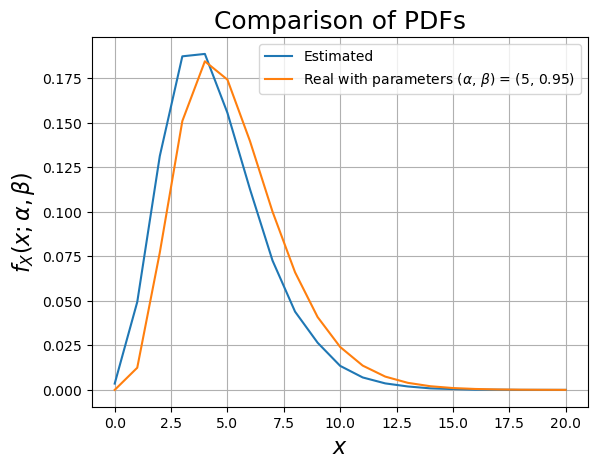

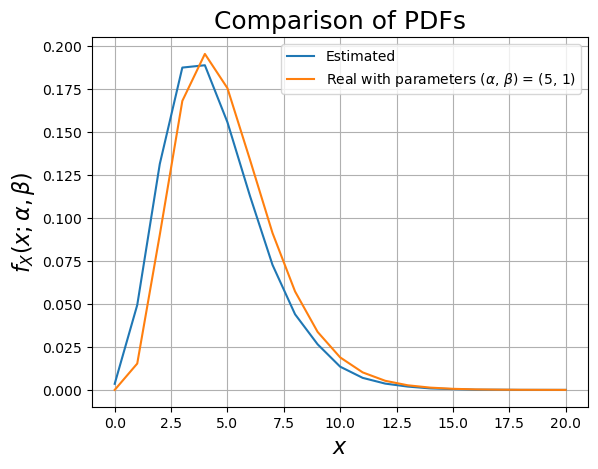

In [5]:
# First, generate a vector for the X-axis of the PDFs.
x_axis = np.linspace(0, 20, len(frequency))

# Define a function that evaluates the probability distribution function of a Gamma random variable
def gamma_pdf(x, alpha, beta):
    g = ((beta**alpha) * (x**(alpha - 1)) * (np.exp(-beta * x))) / (gamma(alpha))
    return g

# Create lists to try different combinations of alpha and beta values
alphas = [1, 2, 3, 4, 5]
betas = [0.8, 0.85, 0.9, 0.95, 1]

# Generate a vector to store the values of the actual Gamma distribution
Gamma = np.zeros((len(frequency), 1))

# Test each beta and alpha within the real function to compare it with
# the previously estimated PDF.
for alpha in alphas:
    for beta in betas:
        for i in range(len(x_axis)):
            Gamma[i] = gamma_pdf(x_axis[i], alpha, beta)
        plt.figure()
        plt.plot(x_axis, pdf)
        plt.plot(x_axis, Gamma)
        plt.grid()
        plt.title('Comparison of PDFs', fontsize=18)
        plt.legend(['Estimated', f'Real with parameters ' + r'($\alpha$, $\beta$) = ' + f'({alpha}, {beta})'])
        plt.xlabel(r'$x$', fontsize=16)
        plt.ylabel(r'$f_X(x; \alpha, \beta)$', fontsize=16)
        plt.show()

Based on the previous graphs, it can be stated that the parameters that best fit the estimated PDF from the histogram in point **a)** are $\alpha = 4$, $\beta=0.85$.

In this case, our $\Delta = 1$, since the intervals decided in the histogram have length 1. Therefore, to estimate the PDF of the data, we used

$$f_Z(a) \approx \frac{P(a \leq z \leq b)}{\Delta}$$
with $\Delta = 1$ and $P(a \leq z \leq b) = \frac{f_{rel}}{N}$, where $f_{rel}$ corresponds to the relative frequency of each data interval, information obtained from the histogram in item a), and $N$ is the total number of data (observations of the random variable).


# Part 2

Consider de following probability density function with parameters $-1 < \rho < 1$ and $\mu_x$, $\mu_y$ $\in \mathbb{R}$:

$$ f_{X,Y}(x,y) = \frac{1}{2\pi\sqrt{1-\rho^2}}\exp{\left(-\frac{(x-\mu_x)^2-2\rho(x-\mu_x)(y-\mu_y)+(y-\mu_y)^2}{2(1-\rho^2)}\right)} \hspace{25px} \forall x,y \in \mathbb{R} $$



### a) We pick the values $\mu_x = 0$, and $\mu_y = 0$. Below, the surface and contour plots of $f_{X,Y}(x,y)$ are presented for various values of the parameter $\rho$

<Figure size 640x480 with 0 Axes>

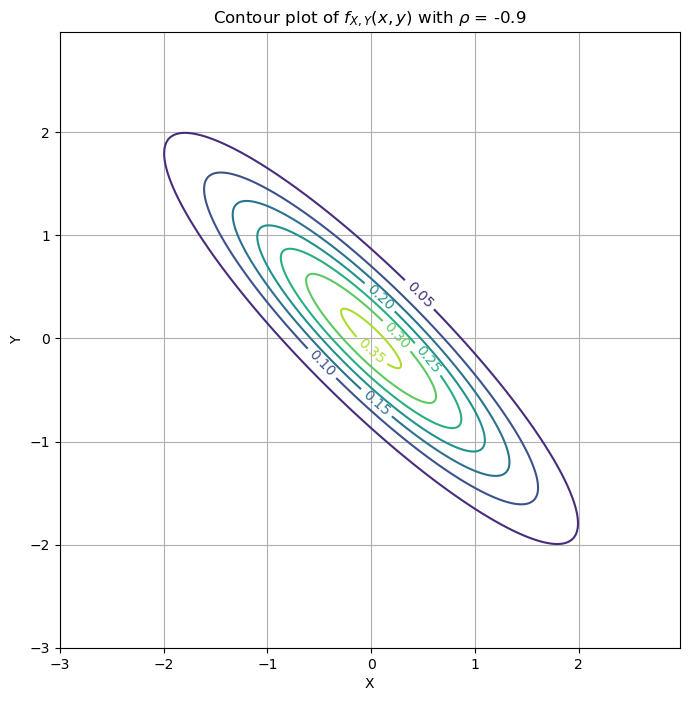

<Figure size 640x480 with 0 Axes>

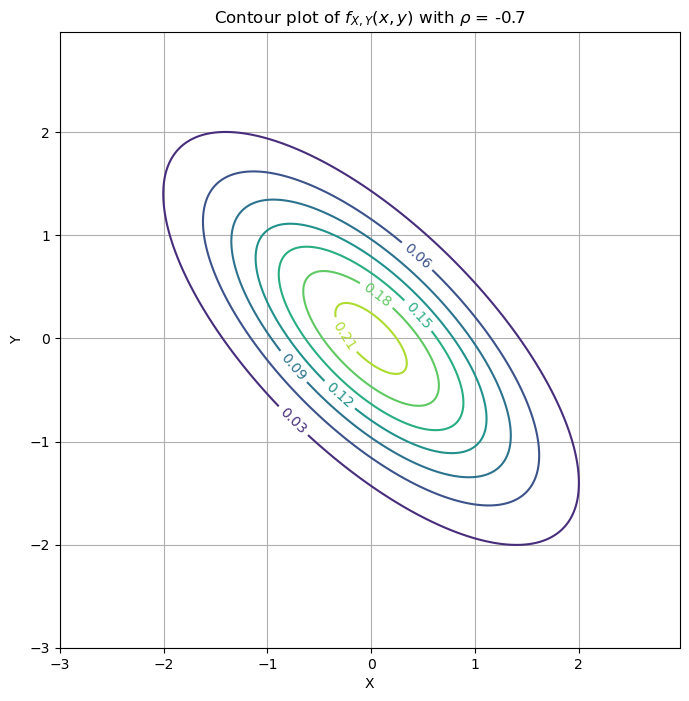

<Figure size 640x480 with 0 Axes>

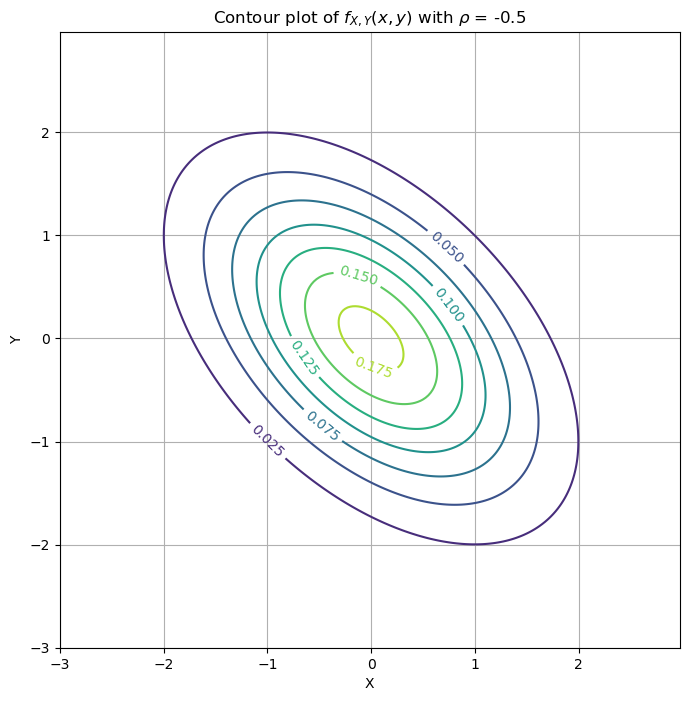

<Figure size 640x480 with 0 Axes>

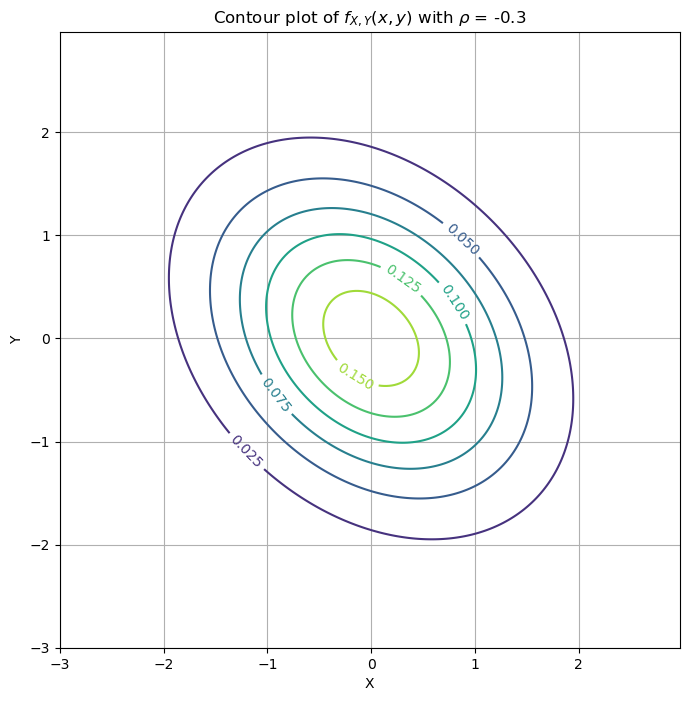

<Figure size 640x480 with 0 Axes>

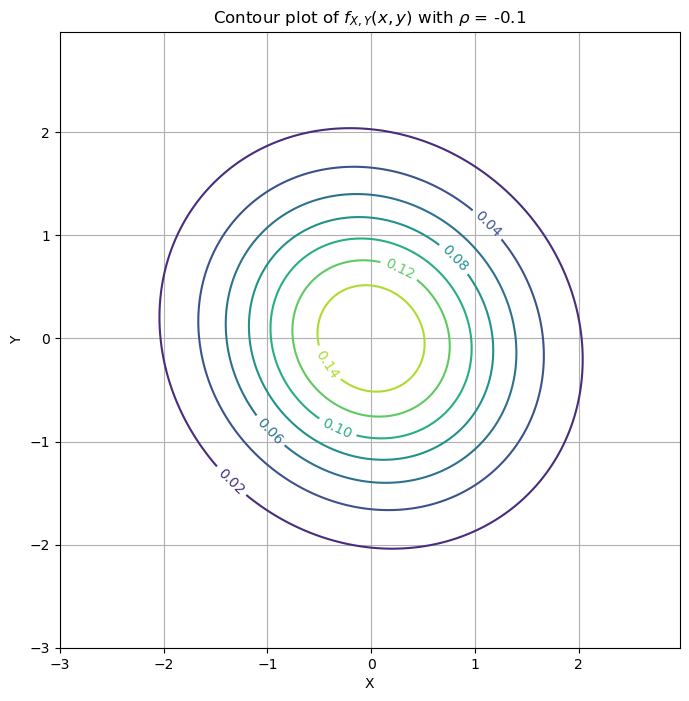

<Figure size 640x480 with 0 Axes>

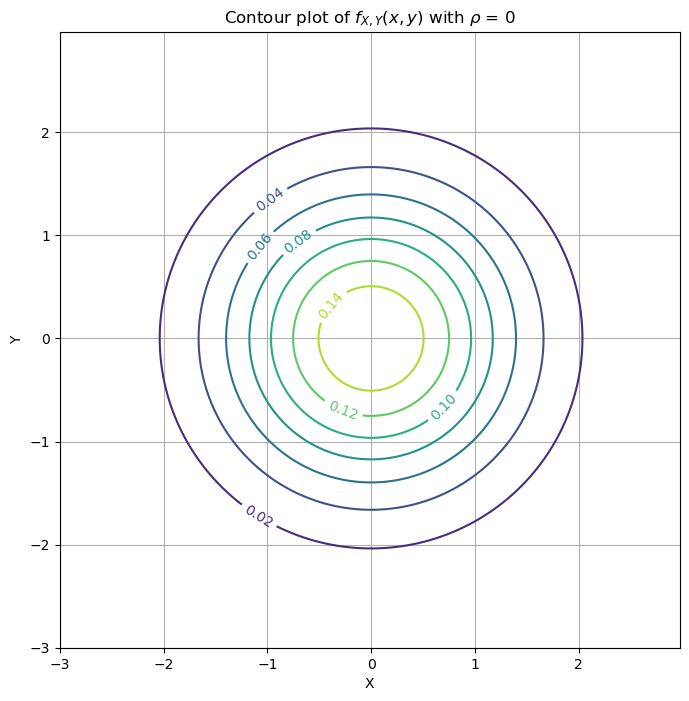

<Figure size 640x480 with 0 Axes>

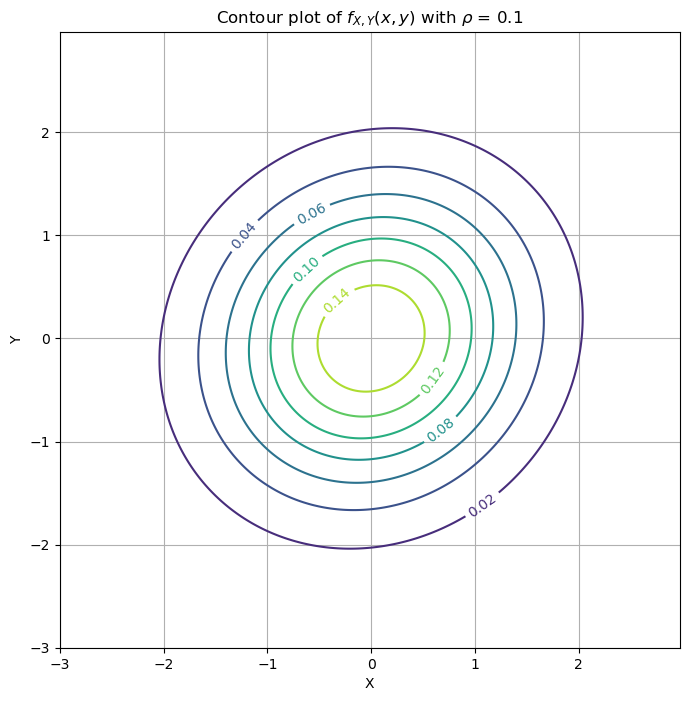

<Figure size 640x480 with 0 Axes>

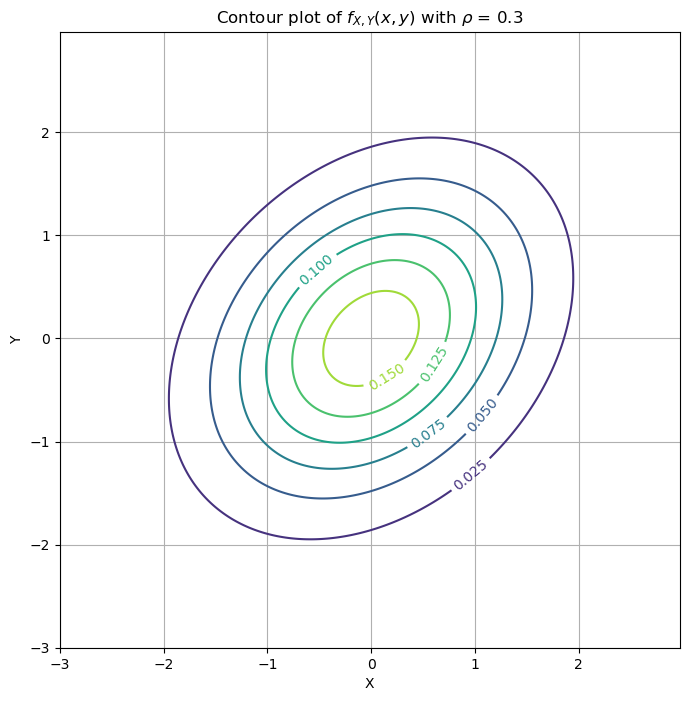

<Figure size 640x480 with 0 Axes>

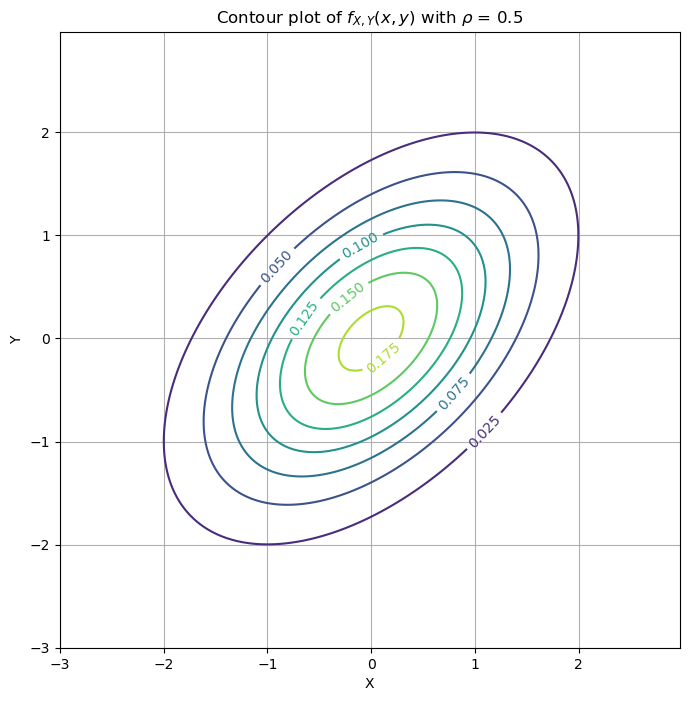

<Figure size 640x480 with 0 Axes>

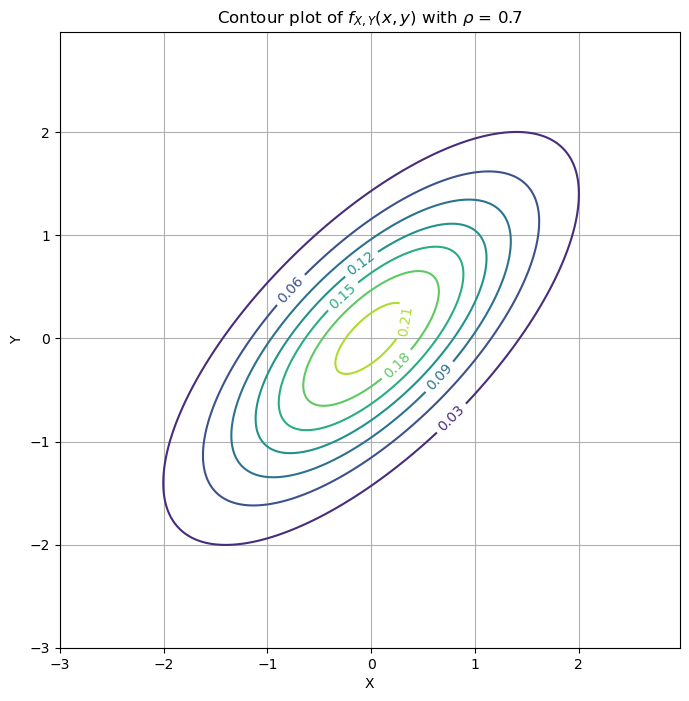

<Figure size 640x480 with 0 Axes>

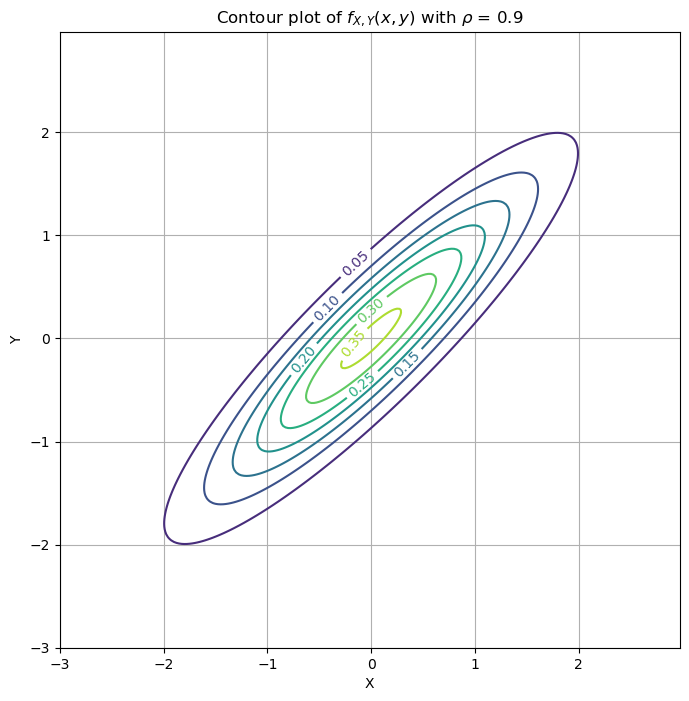

In [6]:
mux = 0
muy = 0
rho = 0.5
rhos = [-0.9, -0.7, -0.5, -0.3, -0.1, 0, 0.1, 0.3, 0.5, 0.7, 0.9]

step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)

X, Y = np.meshgrid(x, y)

for rho in rhos:
    Z = (1/(2*np.pi*np.sqrt(1-rho**2)))*np.exp(-((X-mux)**2-2*rho*(X-mux)*(Y-muy)+(Y-muy)**2)/(2*(1-rho**2)))

    plt.figure()
    fig, ax = plt.subplots(figsize=(8,8))
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(r'Contour plot of $f_{X,Y}(x,y)$ with $\rho$ = ' + f'{rho}')
    ax.grid()
    plt.show()

### b) The data in the text file `dataF.txt` contains a 1000 x 2 matrix, where each row corresponds to an observation of a random variable that follows the $f_{X,Y}(x,y)$ distribution. Determine the parameters $\rho$, $\mu_x$, and $\mu_y$ of this distribution.

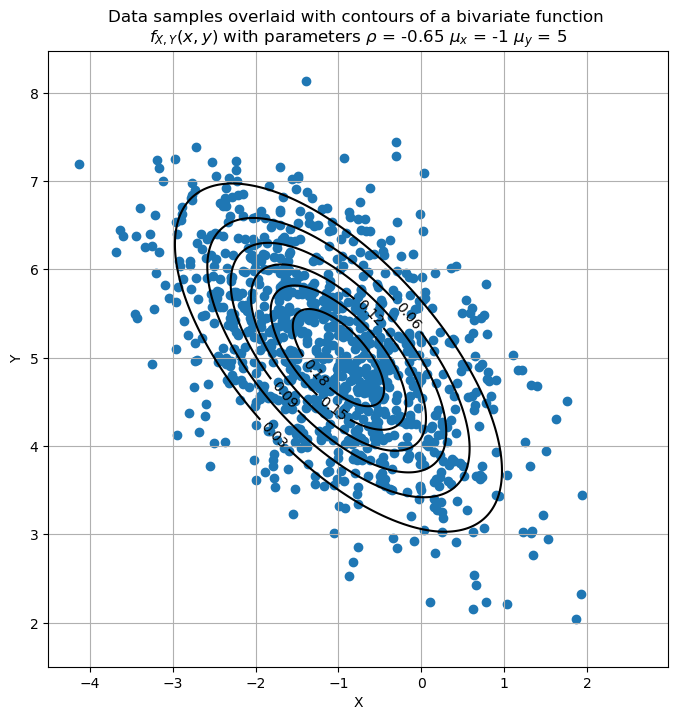

<Figure size 640x480 with 0 Axes>

In [7]:
# Import data from .txt file
filename = 'dataF.txt'
col1_data = np.loadtxt(filename)[:, 0]
col2_data = np.loadtxt(filename)[:, 1]

mu_x_candidate = -1
mu_y_candidate = 5
rho_candidate = -0.65

step = 0.025
x = np.arange(-4.5, 3, step)
y = np.arange(1.5, 8.5, step)

X1, Y1 = np.meshgrid(x, y)
Z1 = (1/(2*np.pi*np.sqrt(1-rho_candidate**2)))*np.exp(-((X1-mu_x_candidate)**2-2*rho_candidate*(X1-mu_x_candidate)*(Y1-mu_y_candidate)+(Y1-mu_y_candidate)**2)/(2*(1-rho_candidate**2)))

fig, ax = plt.subplots(figsize=(8,8))
CS = ax.contour(X1, Y1, Z1, colors=['black'])
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(r'Data samples overlaid with contours of a bivariate function ' + "\n" + r'$f_{X,Y}(x,y)$ with parameters $\rho$ = ' + f'{rho_candidate} ' + r'$\mu_x$ = ' + f'{mu_x_candidate} ' + r'$\mu_y$ = ' + f'{mu_y_candidate}')
ax.grid()
plt.scatter(col1_data, col2_data)
plt.figure()
plt.show()


The parameters of this distribution correspond to approximately $\rho = -0.65$, $\mu_x = -1$, and $\mu_y = 5$.